---
**Grupo**: T11 - Bruno Correia, Gilson Costa, Vivian Liu

**Contato**: `brunovpm@hotmail.com, gilson.costa@gmail.com, liuoliveira.vivian@gmail.com`

**Licença deste notebook**:
![CC BY](https://licensebuttons.net/l/by/3.0/88x31.png)

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)

### Objetivo:

1) Quais seriam as outras abordagem para segmentação dos clientes do ifood?

2) Qual a recomendação do ifood para o próximo pedido do cliente? É possível predizer o próximo pedido? 


### Etapas:

1) Carregando tabelas e importando bibliotecas

2) Exibindo tabela de pedidos 

3) Renomeando variáveis

4) Criação de novas variáveis e realização do de-para com o dicionário de dados

5) Verificação de missing

6) Extraindo algumas informações relevantes

7) Análise exploratória 

8) Escolha das variáveis 




### Dúvidas:
https://docs.google.com/document/d/1u1ts-tFNXRYsTBmcH_5BqC2f2jS4emd9Ypri6WRfIDU/edit

### 1) Carregando tabelas e importando bibliotecas

As tabelas são : df_orders e df_orders_with_cost_revenue

In [0]:
#Carregando tabelas
root_dir = '/dbfs/FileStore/ifood'
dbutils.fs.ls(f'{root_dir}')

df_orders = spark.read.parquet(f'{root_dir}/orders')
df_orders_with_cost_revenue = spark.read.parquet(f'{root_dir}/orders_with_cost_revenue')

#Carregando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import datetime as dt
import re

### 2) Exibindo tabela de pedidos

Além disso será feito o join entre as tabelas df_orders e df_orders_with_cost_revenue

In [0]:
pedidos = df_orders.toPandas().merge(df_orders_with_cost_revenue.toPandas(),on='order_number',how='left')
pedidos.drop(columns=['customer_id_y','frn_id_y','order_date_local_y'],axis=1)
pedidos.head()
orders = pedidos.copy()

/databricks/spark/python/pyspark/sql/types.py:1642: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
 return pa.schema(fields)

### 3) Renomeando colunas na tabela

In [0]:

pedidos.rename(columns={'order_timestamp_local':'data_hora_pedido',
                        'last_status_date_local':'data_ultimo_status_pedido',
                        'order_total':'valor_total_pedido',
                        'credit':'valor_total_desconto',
                        'paid_amount':'valor_pago_pedido',
                        'delivery_type':'tipo_entrega',
                        'scheduled':'houve_agendamento',
                        'scheduled_creation_date_local':'data_criacao_agendamento',
                        'device_app_version':'versao_app',
                        'device_type':'tipo_ambiente',
                        'device_platform':'tipo_plataforma',
                        'payment_method':'metodo_pagamento',
                        'customer_state_label':'estado_entrega',
                        'customer_city':'cidade_entrega',
                        'customer_district':'bairro_entrega',
                        'customer_centroid_id':'centroide_usuario',
                        'customer_has_plus':'assinatura_ativo_na_compra',
                        'customer_seg_status_last_month':'status_usuario_mes_anterior',
                        'customer_seg_recency_bucket':'intervalo_dias_ultima_compra',
                        'customer_seg_frequency_bucket':'frequencia_compra_usuario',
                        'customer_seg_merchant_offer_bucket':'cobertura_restaurantes_usuario',
                        'customer_seg_benefits_sensitivity_bucket':'categoria_compras_promocao_usuario',
                        'customer_seg_marlin_tag':'classificacao_cliente',
                        'customer_seg_gross_income_bucket':'renda_usuario',
                        'frn_id':'id_restaurante',
                        'merchant_city':'cidade_restaurante',
                        'merchant_district':'bairro_restaurante',
                        'merchant_centroid_id':'centroide_restaurante',
                        'merchant_dish_type':'tipo_restaurante',
                        'distance_merchant_customer':'distancia_endereco_restaurante',
                        'promo_is_promotion':'pedido_promocao',
                        'normal_items_quantity':'qtd_itens_sem_promocao',
                        'promo_items_quantity':'qtd_itens_com_promocao',
                        'order_lag_at_login':'tempo_pedido_compra_anterior',
                        'order_lead_at_login':'tempo_pedido_proxima_compra',
                        'order_monthly_lead':'meses_pedido_proxima_compra',
                        'order_monthly_lag':'meses_pedido_compra_anterior',
                        'order_date_local':'data_pedido',
                        'valid_order':'pedido_valido',
                        'months_after_first_purchase': 'diferenca_em_dias_primeiro_pedido',
                        'general_net_profit':'receitas_menos_custo',
                        'frn_id_x':'id_restaurante',
                        'cohort_month':'mes_cliente_primeiro_pedido',
                        'customer_seg_preferred_shift':'segmentacao_shift_maior_numero_pedidos',
                        'order_shift' :'faixa_hora_pedido',
                        'first_order_date':'dia_cliente_primeiro_pedido'
                      
                        },inplace=True)
list(pedidos.columns)

Out[3]: ['order_id',
 'order_number',
 'data_hora_pedido',
 'faixa_hora_pedido',
 'data_ultimo_status_pedido',
 'valor_total_pedido',
 'valor_total_desconto',
 'valor_pago_pedido',
 'tipo_entrega',
 'houve_agendamento',
 'data_criacao_agendamento',
 'versao_app',
 'tipo_ambiente',
 'tipo_plataforma',
 'metodo_pagamento',
 'estado_entrega',
 'cidade_entrega',
 'bairro_entrega',
 'centroide_usuario',
 'assinatura_ativo_na_compra',
 'status_usuario_mes_anterior',
 'intervalo_dias_ultima_compra',
 'frequencia_compra_usuario',
 'cobertura_restaurantes_usuario',
 'categoria_compras_promocao_usuario',
 'classificacao_cliente',
 'renda_usuario',
 'segmentacao_shift_maior_numero_pedidos',
 'id_restaurante',
 'cidade_restaurante',
 'bairro_restaurante',
 'centroide_restaurante',
 'tipo_restaurante',
 'distancia_endereco_restaurante',
 'pedido_promocao',
 'qtd_itens_sem_promocao',
 'qtd_itens_com_promocao',
 'tempo_pedido_compra_anterior',
 'tempo_pedido_proxima_compra',
 'order_date_local_x',
 'pedido_valido',
 'session_id',
 'customer_id_x',
 'customer_id_y',
 'mes_cliente_primeiro_pedido',
 'dia_cliente_primeiro_pedido',
 'diferenca_em_dias_primeiro_pedido',
 'frn_id_y',
 'receitas_menos_custo',
 'order_date_local_y']

### 4) Criação de novas variáveis e realização do de-para com o dicionário de dados

##### Novas variáveis:
- Categorização da faixa de horários dos pedidos.
- Pedido feito fim ou durante a semana.
- latitude e longitude a para endereco de entrega e do estabelecimento
- mes, dia e dia da semana do pedido

In [0]:
#Criando uma coluna com apontamento do pedido no fim de semana ou meio da semana
pedidos['fim_de_semana_pedido'] = pedidos['faixa_hora_pedido'].str.contains("weekday").astype(int)
pedidos['fim_de_semana_pedido'] = np.where(pedidos['fim_de_semana_pedido']==1,'Meio da Semana','Fim da Semana')

#Criando uma coluna com a faixa do horário do pedido
faixa_hora = {'weekday dinner': 'dinner (17 - 23:59h)',
             'weekend dinner': 'dinner (17 - 23:59h)',
              'weekday lunch': 'lunch (10 - 14:59h)',
              'weekend lunch': 'lunch (10 - 14:59h)',
              'weekday snack': 'snack (15 - 16:59h)',
              'weekend snack': 'snack (15 - 16:59h)',
              'weekend dawn': 'dawn (0 - 4:59h)',
              'weekday dawn': 'dawn (0 - 4:59h)',
              'weekday breakfast': 'breakfast (5 - 9:59h)',
              'weekend breakfast': 'breakfast (5 - 9:59h)' }
pedidos['faixa_hora_pedido'] = pedidos['faixa_hora_pedido'].map(faixa_hora)



#De-para categoria de compra do cliente
cliente_promocao = {'Alta': '> 66% das compras utilizando promoção',
                   'Media': '33-66% das compras utilizando promoção',
                    'Baixa': '<33% das compras utilizando promoção'}

pedidos['categoria_compras_promocao_usuario'] = pedidos['categoria_compras_promocao_usuario'].map(cliente_promocao)

#De-para da coluna que indica a presença de promoção
pedidos['pedido_promocao'] = np.where(pedidos['pedido_promocao'] == 1.0 ,'Sim','Não')

#De-para frequencia de compra do cliente por mês
freq_mes_cliente = {1: 'Menos que 1 pedido/mês',
                       2: 'Entre 1 e 2 pedidos/mês',
                       3: 'Entre 2 e 4 pedidos/mês',
                       4: 'Entre 4 e 10 pedidos/mês',
                       5: 'Mais que 10 pedidos/mês'}

pedidos['frequencia_compra_usuario'] = pedidos['frequencia_compra_usuario'].map(freq_mes_cliente)

#De-para da renda estimado do ibge por localizacao
renda_estimada_ibge = {1: '> 19960',
                       2: '9998 - 19960',
                       3: '3992 - 9998',
                       4: '1996 - 3992',
                       5: '< 1996',
                       6: 'Sem informação'}

pedidos['renda_usuario'] = pedidos['renda_usuario'].map(renda_estimada_ibge)

#De-para intervalo em dias ultima compra
intervalo_dias = {1: '> 91 dias',
                 2: '28 e 91 dias atrás',
                 3: '14 e 28 dias atrás',
                 4: '7 e 14 dias atrás',
                 5: '< 7 dias'}

pedidos['intervalo_dias_ultima_compra'] = pedidos['intervalo_dias_ultima_compra'].map(intervalo_dias)

#De-para com a cobertura do restaurante

cobertura = {1: '0 - 30',
             2: '30 - 90',
             3: '90 - 150',
             4: '150 - 500',
             5: '> 500'}

pedidos['cobertura_restaurantes_usuario'] = pedidos['cobertura_restaurantes_usuario'].map(cobertura)

#tipos de cliente
tipo_consumidor = {'1. Marlin': 'otimo',
                   '2. Tilapia': 'medio',
                   '3. Subsidy Carp': 'regular',
                   '4. Retention Carp': 'regular/ruim'}

pedidos['classificacao_cliente'] = pedidos['classificacao_cliente'].map(tipo_consumidor)

#Dropando colunas iguais entre pedidos e pedidos com custo
pedidos = pedidos.drop(columns=['customer_id_y','order_date_local_y','frn_id_y'],axis=1)

#criando variavel mes 
pedidos['mes_pedido']= (pd.to_datetime(pedidos.data_hora_pedido, unit='ns',errors='coerce')).dt.month

#criando variavel dia
pedidos['dia_pedido']= (pd.to_datetime(pedidos.data_hora_pedido, unit='ns',errors='coerce')).dt.day

#criando variavel hora
pedidos['hora_pedido']= (pd.to_datetime(pedidos.data_hora_pedido, unit='ns',errors='coerce')).dt.hour

#criando variavel dia da semana
pedidos['dia_semana_pedido']= (pd.to_datetime(pedidos.data_hora_pedido, unit='ns',errors='coerce')).dt.weekday_name

#criando variavel mes 
pedidos['mes_cliente_primeiro_pedido']= (pd.to_datetime(pedidos.mes_cliente_primeiro_pedido, unit='ns',errors='coerce')).dt.month

#criando variavel dia
pedidos['dia_cliente_primeiro_pedido']= (pd.to_datetime(pedidos.dia_cliente_primeiro_pedido, unit='ns',errors='coerce')).dt.day

pedidos['lat_usuario'] = pedidos['centroide_usuario'].apply(lambda x : re.split(r'[0-9]-', x)[0])
pedidos['log_usuario'] = '-' + pedidos['centroide_usuario'].apply(lambda x : re.split(r'[0-9]-', x)[1])

pedidos['lat_restaurante'] = pedidos['centroide_restaurante'].apply(lambda x : re.split(r'[0-9]-', x)[0])
pedidos['log_restaurante'] = pedidos['centroide_restaurante'].apply(lambda x : re.split(r'[0-9]-', x))
pedidos['log_restaurante']  = '-' + pedidos.log_restaurante.apply(lambda x: x[x.index(max(x))])

### 5) Verificação de missing

Criação de uma tabela que exiba:

- Nome da variável
- Tipo da variável 
- Quantidade e percentual de missing.

In [0]:
missing = pd.DataFrame({'types':pedidos.dtypes
                        , 'percentual_nulo': round(pedidos.isna().sum()/len(pedidos)*100,2)
                        , 'Quantidade' : pedidos.isna().sum()
                        })
#missing = missing[missing['percentual_nulo'] > 0]
missing.sort_values(by='Quantidade', ascending=False)

,types,percentual_nulo,Quantidade
assinatura_ativo_na_compra,object,59.16,291126
segmentacao_shift_maior_numero_pedidos,object,39.76,195687
classificacao_cliente,object,12.31,60587
tempo_pedido_proxima_compra,float64,2.73,13431
cobertura_restaurantes_usuario,object,1.71,8420
categoria_compras_promocao_usuario,object,1.71,8417
intervalo_dias_ultima_compra,object,1.71,8417
frequencia_compra_usuario,object,1.71,8417
session_id,object,1.70,8346
renda_usuario,object,1.69,8301


##### Quantidade de valores por variável categorica

In [0]:
categoricas = pedidos.select_dtypes(include=['object','bool']).nunique().reset_index()
categoricas.rename(columns= {'index' :'categoricas',0:'valores distintos'},inplace=True)

remover =['order_id','data_pedido_horario_local','data_criacao_afendamento','session_id','data_ultimo_status_pedido	']

#Comando not is in
categoricas[~categoricas.categoricas.isin(remover)].sort_values(by='valores distintos')


,categoricas,valores distintos
32,fim_de_semana_pedido,2
4,tipo_entrega,2
5,houve_agendamento,2
8,tipo_ambiente,2
28,pedido_promocao,2
15,assinatura_ativo_na_compra,2
20,categoria_compras_promocao_usuario,3
21,classificacao_cliente,4
9,tipo_plataforma,4
10,metodo_pagamento,4


### 6) Extraindo algumas informações relevantes nas tabelas

Aqui trazemos o número de registro, variáveis, clientes,cidades e bairros distintos nas tabelas

In [0]:
print("Quantidade de registros:" ,pedidos.shape[0])
print("Quantidade de variáveis:" , pedidos.shape[1])
print("Quantidade de clientes diferentes:", pedidos.customer_id_x.nunique())
print("Quantidade de restaurantes diferentes:", pedidos.id_restaurante.nunique())
print("Quantidade de cidades diferentes (endereço de entrega):", pedidos.cidade_restaurante.nunique())
print("Quantidade de bairros diferentes (endereço de entrega):", pedidos.bairro_entrega.nunique())


Quantidade de registros: 492138
Quantidade de variáveis: 56
Quantidade de clientes diferentes: 30079
Quantidade de restaurantes diferentes: 71861
Quantidade de cidades diferentes (endereço de entrega): 563
Quantidade de bairros diferentes (endereço de entrega): 13998

### 7) Análise exploratória

#####  Quais periodos vendem mais? manha, tarde noite ou madrugada? Qual tipo/horário que vende mais?

- há um maior volume de pedidos no horário da janta entre 17h00 as 23h59. 

- Em dados brutos o maior volume de pedidos é durante a semana 54,9%, no entanto vale a atenção pois tem-se menos dias no final de semana comparado com o meio da semana. Padronizando os volumes pela quantidade de dias temos um maior valume de atendimento nos finais de semana com uma taxa de 67,24%  comparado-o com seg-sex


##### Quais periodos são mais caros? manha, tarde noite ou madrugada? Qual tipo/horário que vende mais?

- Há um preço maior nos pedidos no horário da janta entre 17h00 as 23h59

- Os pedidos no final de semana costumam ser mais caros por apresentar um grande volume de 'jantas' que por fim acaba puxando a média de preços para cima

In [0]:
!pip install plotly
import plotly.express as px

dados= pedidos.groupby('fim_de_semana_pedido')['order_number'].count().reset_index()

fig = px.pie(dados,
             values="order_number",
             names="fim_de_semana_pedido",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
fig.show()

In [0]:
import warnings
warnings.filterwarnings("ignore")

data = pedidos.groupby('fim_de_semana_pedido')['order_number'].count().reset_index()

#Dividindo fim de semana por dia
data['order_number'][data['fim_de_semana_pedido'] == 'Fim da Semana'] = data['order_number'][data['fim_de_semana_pedido'] == 'Fim da Semana']/2
  
#dividindo meio da semana por dia
data['order_number'][data['fim_de_semana_pedido'] == 'Meio da Semana'] = data['order_number'][data['fim_de_semana_pedido'] == 'Meio da Semana']/5
  
#Criando tabela com % ponderado por dia
data['%'] = data['order_number']/sum(data.order_number)*100
dados = data[['fim_de_semana_pedido','%']]

fig = px.pie(dados,
             values="%",
             names="fim_de_semana_pedido",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")

fig.show()

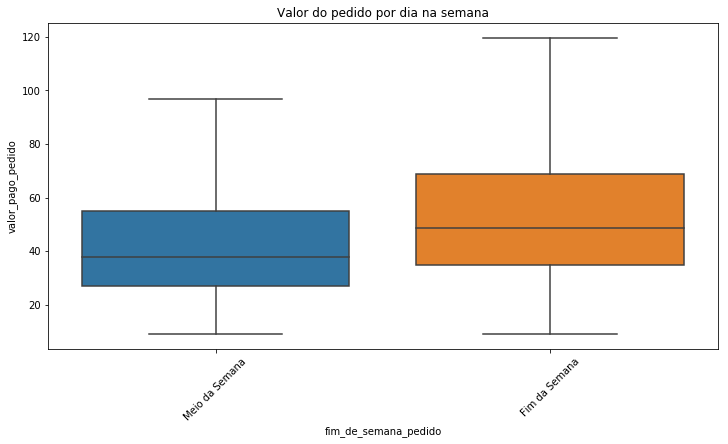

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='fim_de_semana_pedido'
            , y='valor_pago_pedido'
            , data = pedidos
            ,showfliers=False #tira os outliers no plot (rodar sem ele)
           ) 
plt.title('Valor do pedido por dia na semana')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = data= pedidos.groupby(['faixa_hora_pedido','fim_de_semana_pedido'])['order_number'].count().reset_index()
fig = px.bar(grgs, x="faixa_hora_pedido", y="order_number", color='fim_de_semana_pedido', barmode='stack')
fig.show()

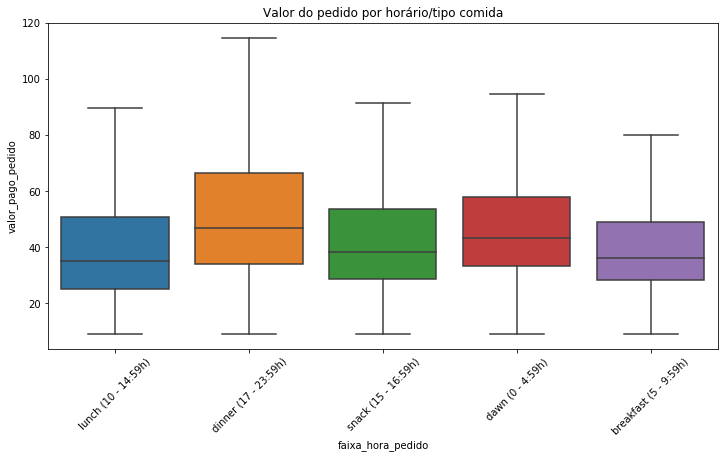

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='faixa_hora_pedido'
            , y='valor_pago_pedido'
            , data = pedidos
            ,showfliers=False #tira os outliers no plot (rodar sem ele)
           ) 
plt.title('Valor do pedido por horário/tipo comida')
plt.xticks(rotation = 45)
plt.show()

#####  Quais tipos de comida que vendem mais? quantos tipos temos? é possível prever o próxima comida a ser pedida?


- Na base tem-se 56 tipos de comidas sendo que Lanches, Comida Brasileira e Pizza juntos representam 64,6% do volume de pedidos os outrs 53 itens representam os outros 45,4%.

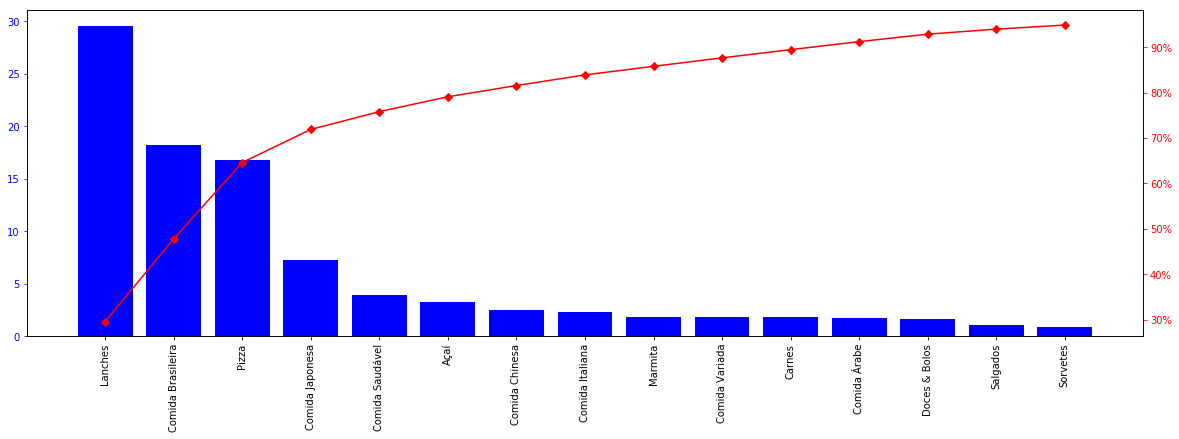

In [0]:
tabela = pedidos['tipo_restaurante'].value_counts().reset_index()
tabela['percentual'] = tabela['tipo_restaurante']/len(pedidos)*100
tabela['percentual acumulado'] = tabela['percentual'].cumsum()
tabela.rename(columns={"merchant_dish_type": "Quantidade", "index": "Tipos de pedido"},inplace=True)

from matplotlib.ticker import PercentFormatter
tabela2 = tabela.head(15)
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(tabela2['Tipos de pedido'], tabela2['percentual'], color="blue")
ax2 = ax.twinx()
ax2.plot(tabela2['Tipos de pedido'], tabela2['percentual acumulado'], color="red", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="blue")
ax2.tick_params(axis="y", colors="red")

#Rotacionar o label
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

In [0]:
tabela

,Tipos de pedido,tipo_restaurante,percentual,percentual acumulado
0,Lanches,145585,29.582150,29.582150
1,Comida Brasileira,89551,18.196319,47.778469
2,Pizza,82781,16.820689,64.599157
3,Comida Japonesa,35804,7.275195,71.874352
4,Comida Saudável,19283,3.918210,75.792562
5,Açaí,16123,3.276114,79.068676
6,Comida Chinesa,12154,2.469633,81.538308
7,Comida Italiana,11530,2.342839,83.881147
8,Marmita,9285,1.886666,85.767813
9,Comida Variada,9186,1.866550,87.634363


##### Quais regiões vendem mais?

- O estado de São Paulo representa 38,35% no total de pedidos da base sendo assim o estado com mais pedidos.

- No estado de São paulo temos a cidade de SP que representa mais que a metade de pedidos do estado.

- O Bairros como Vila Mariana, Bela vista, Jardim Paulista e Pinheiros estão nos bairros que possuem maior número de pedidos.

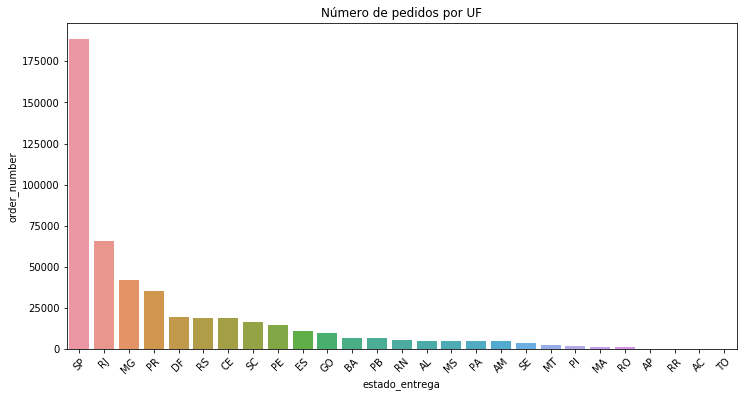

In [0]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'estado_entrega'
            , y = 'order_number'
            , data= pedidos.groupby('estado_entrega')['order_number'].count().reset_index().sort_values(by='order_number',ascending= False))
plt.title('Número de pedidos por UF')
plt.xticks(rotation = 45)
plt.show()

In [0]:
aux_estado = pedidos.groupby('estado_entrega')['order_number'].count().reset_index().sort_values(by='order_number',ascending= False)
aux_estado['percentual'] = aux_estado['order_number']/len(pedidos)*100
aux_estado['percentual acumulado'] = aux_estado['percentual'].cumsum()

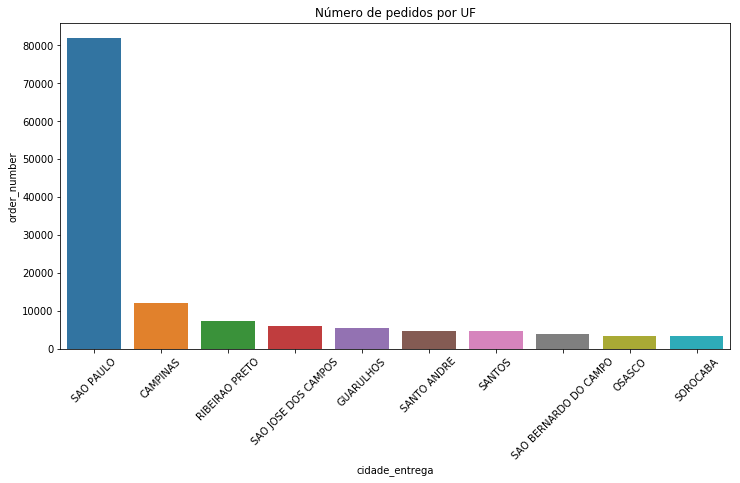

In [0]:
sp = pedidos[pedidos['estado_entrega']=='SP']

plt.figure(figsize = (12,6))
sns.barplot(x = 'cidade_entrega'
            , y = 'order_number'
            , data= sp.groupby('cidade_entrega')['order_number'].count().reset_index().sort_values(by='order_number',ascending= False).head(10))
plt.title('Número de pedidos por UF')
plt.xticks(rotation = 45)
plt.show()

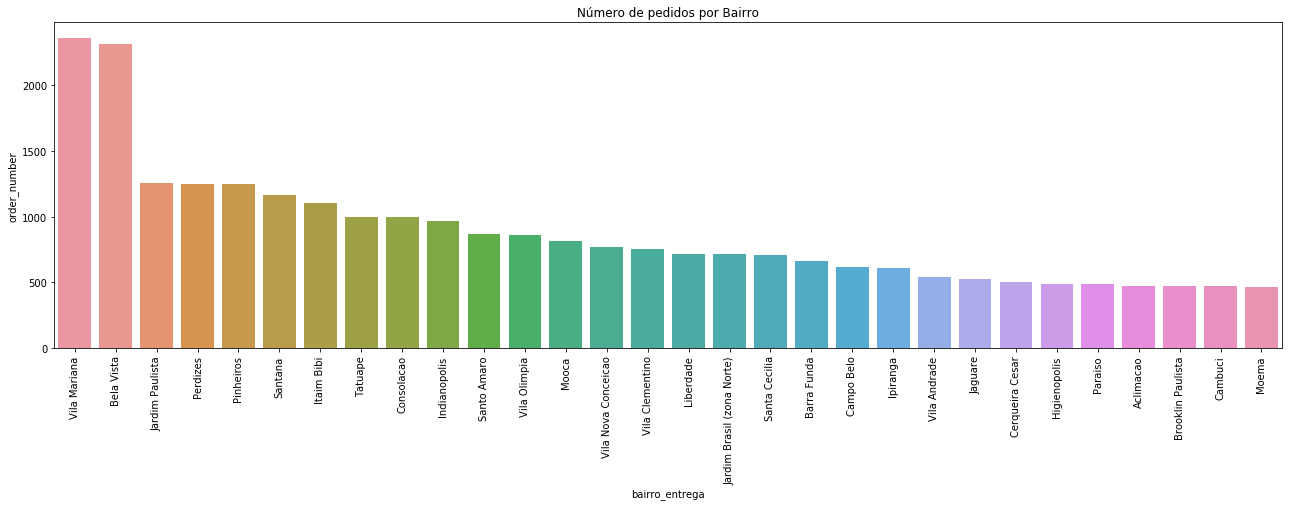

In [0]:
cid_sp = sp[sp['cidade_entrega']=='SAO PAULO']
plt.figure(figsize = (22,6))
sns.barplot(x = 'bairro_entrega'
            , y = 'order_number'
            , data= cid_sp.groupby('bairro_entrega')['order_number'].count().reset_index().sort_values(by='order_number',ascending= False).head(30))
plt.title('Número de pedidos por Bairro')
plt.xticks(rotation = 90)
plt.show()

##### O que caracteriza o preço do pedido? a plataforma que usou? o perfil do cliente?

- Pedidos feitos por IOS ou Desktop apresentam média de preço um pouco superior comparada com pedidos feitos de Android ou outros

- Clientes que não costumam comprar com promoção (<33% pedidos com promoção) acabam pagando em média mais caro no pedido comparado com clientes que compram com mais frequencia com promoção. Além disso, há um maior número de pedidos por clientes que possuem um perfil de compra por promoção.

- A frequência de pedidos no mês de um cliente parece não influênciar no preço médio de compra, ou seja um cliente que compra mais não significa que pega mais barato

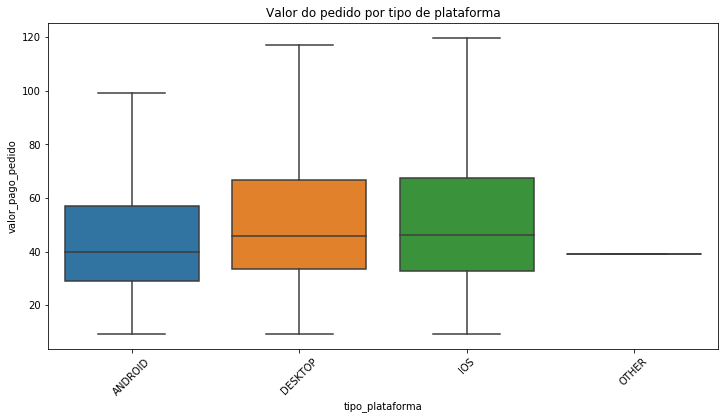

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='tipo_plataforma'
            , y='valor_pago_pedido'
            , data = pedidos
            ,showfliers=False #tira os outliers no plot (rodar sem ele)
           ) 
plt.title('Valor do pedido por tipo de plataforma')
plt.xticks(rotation = 45)
plt.show()

In [0]:
(pedidos.tipo_ambiente.value_counts(normalize=True)*100).reset_index()

,index,tipo_ambiente
0,MOBILE,97.411493
1,SITE,2.588507


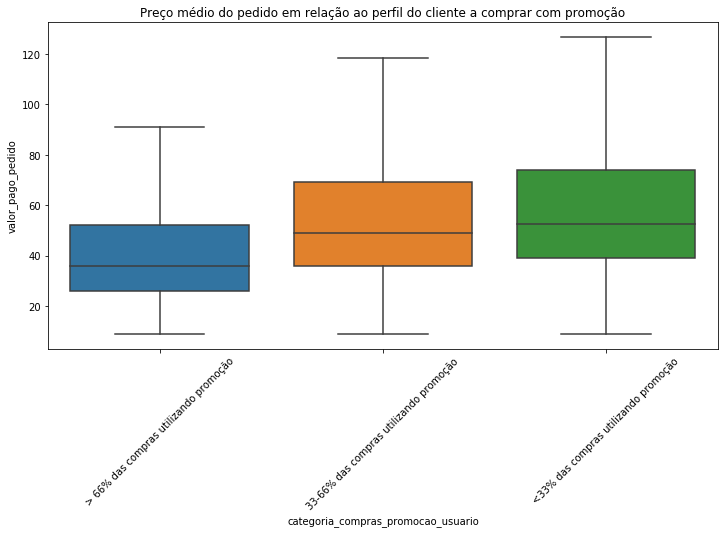

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'categoria_compras_promocao_usuario'
            , y = 'valor_pago_pedido'
           ,showfliers=False #esconde os outliers
            , data= pedidos)
plt.title('Preço médio do pedido em relação ao perfil do cliente a comprar com promoção')
plt.xticks(rotation = 45)
plt.show()

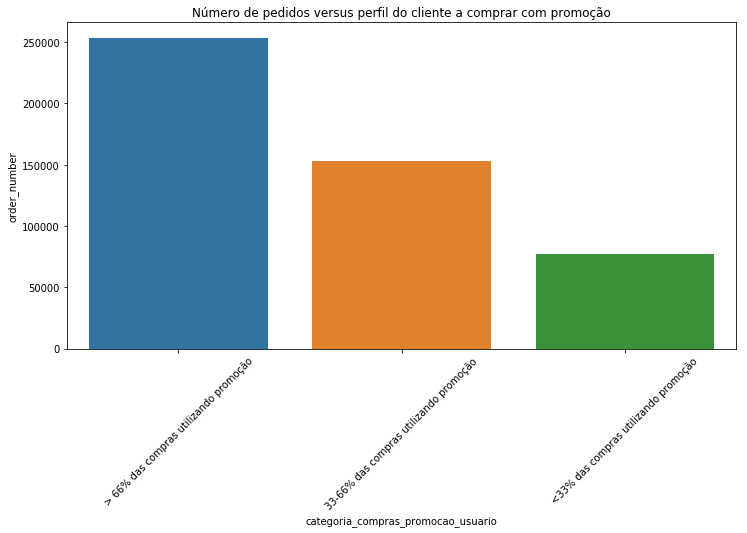

In [0]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'categoria_compras_promocao_usuario'
            , y = 'order_number'
            , data= pedidos.groupby('categoria_compras_promocao_usuario')['order_number'].count().reset_index().sort_values(by='order_number'
                                                                                                                            ,ascending= False))
plt.title('Número de pedidos versus perfil do cliente a comprar com promoção')
plt.xticks(rotation = 45)
plt.show()

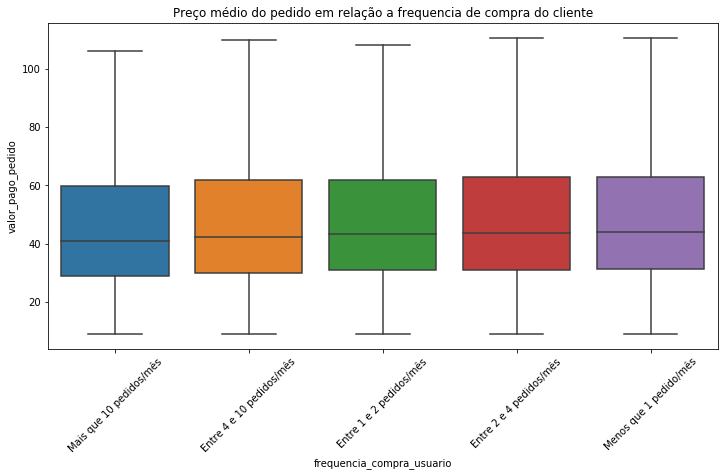

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'frequencia_compra_usuario'
            , y = 'valor_pago_pedido'
            ,showfliers=False #esconde os outliers
            , data= pedidos)
plt.title('Preço médio do pedido em relação a frequencia de compra do cliente')
plt.xticks(rotation = 45)
plt.show()

In [0]:
import plotly.express as px

dados= pedidos.groupby('pedido_promocao')['order_number'].count().reset_index()

fig = px.pie(dados,
             values="order_number",
             names="pedido_promocao",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
fig.show()


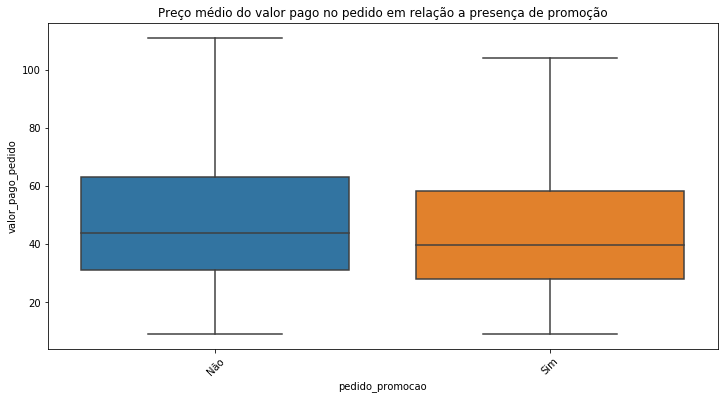

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'pedido_promocao'
            , y = 'valor_pago_pedido'
            ,showfliers=False #esconde os outliers
            , data= pedidos)
plt.title('Preço médio do valor pago no pedido em relação a presença de promoção')
plt.xticks(rotation = 45)
plt.show()

##### Qual a frequencia de compras dos clientes? temos mais clientes que compram n vezes ao mês?

- Há uma maior quantidade de clientes que compram na faixa de 4 a 10 pedidos no mês

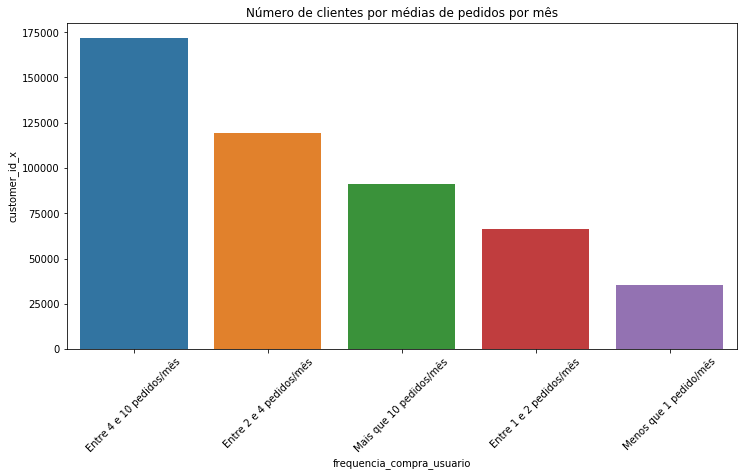

In [0]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'frequencia_compra_usuario'
            , y = 'customer_id_x'
            , data= pedidos.groupby('frequencia_compra_usuario')['customer_id_x'].count().reset_index().sort_values(by='customer_id_x'
                                                                                                                    ,ascending= False))
plt.title('Número de clientes por médias de pedidos por mês')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pedidos['tempo_pedido_compra_anterior'].describe()

Out[27]: count 487048.000000
mean 10.914863
std 33.566832
min 0.000000
25% 1.000000
50% 4.000000
75% 10.000000
max 2614.000000
Name: tempo_pedido_compra_anterior, dtype: float64

In [0]:
pedidos['tempo_pedido_proxima_compra'].describe()

Out[28]: count 478707.000000
mean 9.723142
std 18.391997
min 0.000000
25% 1.000000
50% 4.000000
75% 10.000000
max 247.000000
Name: tempo_pedido_proxima_compra, dtype: float64

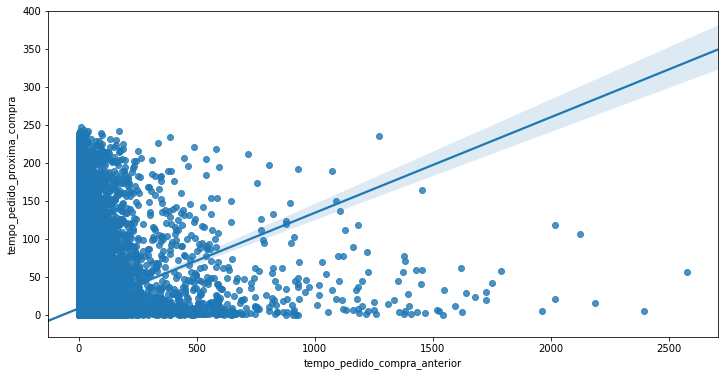

In [0]:

plt.figure(figsize = (12,6))
sns.regplot(x=pedidos['tempo_pedido_compra_anterior'],y=pedidos['tempo_pedido_proxima_compra'])
plt.show()

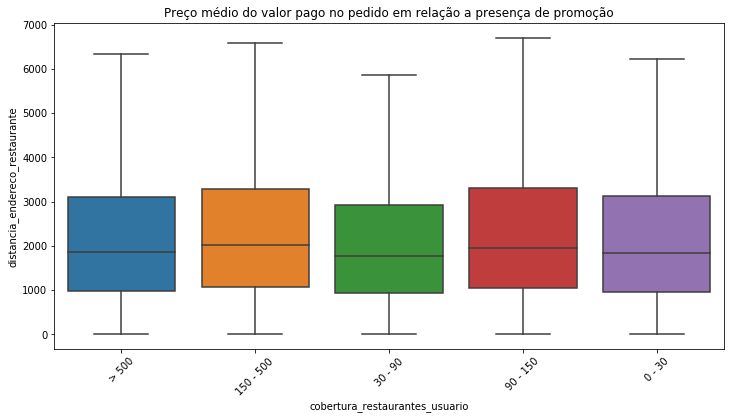

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'cobertura_restaurantes_usuario'
            , y = 'distancia_endereco_restaurante'
            ,showfliers=False #esconde os outliers
            , data= pedidos)
plt.title('Preço médio do valor pago no pedido em relação a presença de promoção')
plt.xticks(rotation = 45)
plt.show()

##### Os pedidos são feitos mais por delivery ou retirada no local?

99,7% dos pedidos são feitos por delivery

In [0]:
dados= pedidos.groupby('tipo_entrega')['order_number'].count().reset_index()

fig = px.pie(dados,
             values="order_number",
             names="tipo_entrega",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
fig.show()

##### Versão do app utilizado

Há uma alta granularidade da variável versao_app 722 valores distintos (valor alto para cariável categórica)

In [0]:
pedidos.versao_app.value_counts()

Out[32]: 9.30.0 21766
Android_iFood_9.4.1 18141
9.27.0 15499
iOS_iFood_9.5.0 15345
Android_iFood_9.8.0 12161
Android_iFood_9.20.0 12148
iOS_iFood_9.17.1 11089
9.28.1 10916
iOS_iFood_9.18.0 10897
iOS_iFood_9.8.1 10574
Android_iFood_9.3.1 10039
Android_iFood_9.23.0 9958
Android_iFood_9.6.2 9736
Android_iFood_9.12.0 9058
Android_iFood_9.18.2 9030
Android_iFood_9.24.2 8629
Android_iFood_9.13.0 8150
9.28.0 8006
iOS_iFood_9.23.0 7719
9.29.1 7472
iOS_iFood_9.20.0 7424
Android_iFood_9.14.1 7299
Android_iFood_9.22.1 7294
Android_iFood_9.7.1 7271
9.31.0 7052
iOS_iFood_9.16.1 6879
iOS_iFood_9.24.1 6668
Android_iFood_9.7.2 6410
Android_iFood_9.26.0 6213
iOS_iFood_9.11.0 6078
 ... 
8.15.0 1
iPad 4 (WiFi)_iFood_9.17.0 1
iPad 9.7-Inch 6th Gen (Wi-Fi Only)_iFood_9.11.0 1
iPad Pro 12.9 inch (Wi-Fi) 3rd Gen_iFood_9.25.0 1
iPad Air 2 (Wi-Fi + Cellular)_iFood_9.14.0 1
ALEXA 1
iPad Pro 10.5 inch (Wi-Fi)_iFood_9.24.1 1
iPad 4 (WiFi)_iFood_9.19.0 1
Android_SpoonRocket_4.0.2 1
iPad Pro 10.5-Inch (Wi-Fi Only)_iFood_9.15.0 1
iPad Mini 4 (Wi-Fi)_iFood_9.24.0 1
iPad Pro 11-Inch (Wi-Fi/Cellular)_iFood_9.9.0 1
iPad Pro (Wi-Fi/Cellular)_iFood_9.17.0 1
iPad Pro 10.5-Inch (Wi-Fi Only)_iFood_9.10.0 1
iPad Pro 11 inch (Wi-Fi + Cellular)_iFood_9.23.0 1
8.29.3 1
webapp_4.7.0 1
pwa_5.6.1 1
Android_iFood_8.20.0 1
iPad Pro (Wi-Fi)_iFood_9.23.0 1
iPad 4 (WiFi)_iFood_9.16.1 1
9.7-inch iPad (Wi-Fi)_iFood_9.19.4 1
iPad Pro 10.5-Inch (Wi-Fi Only)_iFood_9.13.0 1
iPad Pro 10.5-Inch (Wi-Fi Only)_iFood_9.19.0 1
iOS_iFood_6.5.2 1
iPad Pro (Wi-Fi + Cellular)_iFood_9.24.1 1
iPad Mini Retina (Wi-Fi)_iFood_9.24.1 1
iPad Mini Retina (Wi-Fi)_iFood_9.23.0 1
iPod Touch 6th Gen_iFood_9.24.0 1
iPad Pro 12.9-Inch 1TB (Wi-Fi Only - 3rd Gen)_iFood_9.26.0 1
Name: versao_app, Length: 722, dtype: int64

##### Os pedidos feitos são por agendamento?

98,63% não são feitos por agendamento

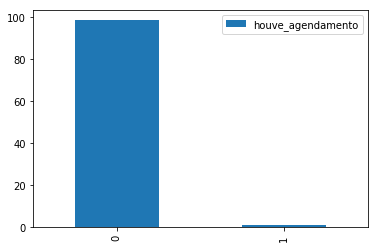

In [0]:
(pedidos.houve_agendamento.value_counts(normalize=True)*100).reset_index().plot(kind='bar')

##### Método de pagamento

60,8% dos pedidos são feitos com método de pagamento online

In [0]:
dados= pedidos.groupby('metodo_pagamento')['order_number'].count().reset_index()
fig = px.pie(dados,
             values="order_number",
             names="metodo_pagamento",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
fig.show()

##### Qual a  segmentação dos clientes de acordo com os numeros de pedidos?

A coluna segmentacao apresenta 5 categorias sendo que somando a mais frequente (jantar 48,77%) e os valores nulos (39,76%) temos 88,53% de valores concentrados em uma única categorias + nulos

In [0]:
(pedidos.segmentacao_shift_maior_numero_pedidos.value_counts(dropna=False,normalize=True)*100).reset_index()

,index,segmentacao_shift_maior_numero_pedidos
0,5. Jantar,48.770670
1,NaN,39.762628
2,3. Almoço,10.323527
3,4. Lanche da Tarde,0.713215
4,1. Madrugada,0.423662
5,2. Café da Manha,0.006299


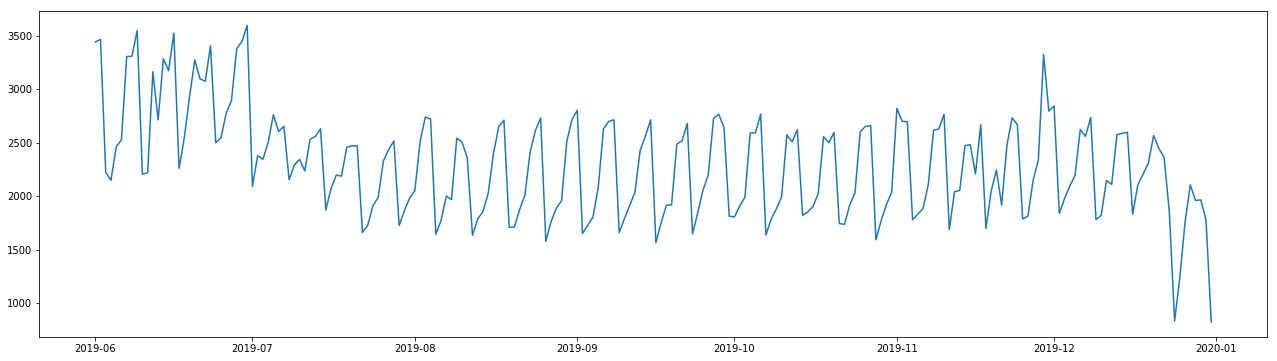

In [0]:
plt.figure(figsize = (22,6))
pedidos['order_date_local_x'] = pd.to_datetime(pedidos['order_date_local_x']).dt.date
aux = pedidos.groupby('order_date_local_x')['order_number'].count().reset_index()
plt.plot(aux.order_date_local_x, aux.order_number)

In [0]:
numericas_pedidos = pedidos.select_dtypes('float64')
numericas_pedidos.head()

,valor_total_pedido,valor_total_desconto,valor_pago_pedido,distancia_endereco_restaurante,qtd_itens_sem_promocao,qtd_itens_com_promocao,tempo_pedido_compra_anterior,tempo_pedido_proxima_compra,diferenca_em_dias_primeiro_pedido,receitas_menos_custo
0,28.90,14.0,24.9,2722.603906,2.0,0.0,2.0,1.0,32.0,6.901044
1,56.35,7.9,50.4,1108.823183,0.0,1.0,7.0,1.0,35.0,6.028775
2,53.80,4.0,49.8,1642.258522,2.0,0.0,5.0,1.0,20.0,9.878150
3,58.90,4.0,54.9,441.677507,1.0,0.0,9.0,2.0,21.0,10.487919
4,54.80,14.0,50.8,4398.730930,0.0,2.0,3.0,4.0,20.0,9.070275


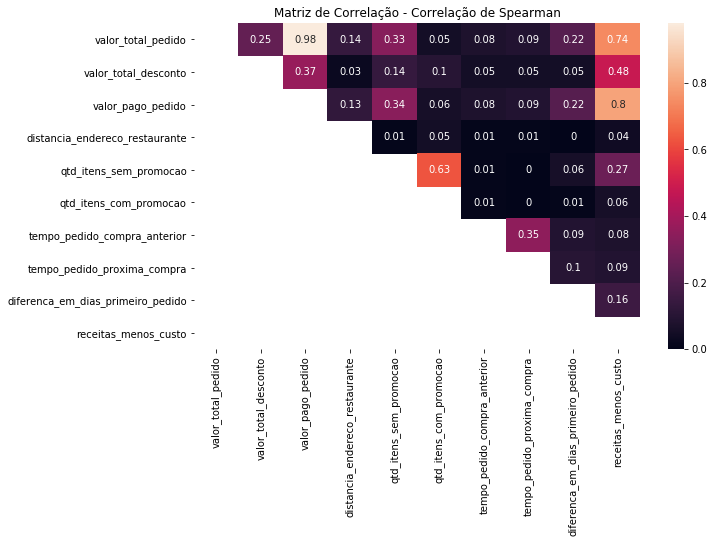

In [0]:
correlação = round(abs(numericas_pedidos.corr(method='spearman')),2)
triangulo = correlação.where(np.triu(np.ones(correlação.shape), k=1).astype(np.bool))

#Criando uma representação gráfica para a matriz de correlação
sns.heatmap(triangulo, 
            xticklabels=correlação.columns.values,
            yticklabels=correlação.columns.values,annot=True)

plt.title('Matriz de Correlação - Correlação de Spearman')
plt.gcf().set_size_inches(10,6)
plt.show()

In [0]:
#Ponto de corte
corte_alta_correlação = 0.7

#Selecionando colunas com correlações acima do corte
dropar = [colunas for colunas in triangulo.columns if any(triangulo[colunas] > corte_alta_correlação )]

print('Temos {} colunas para remover'.format(len(dropar)))

print('As colunas removidas serão', dropar)

#pedidos = pedidos.drop(columns = dropar)

Temos 2 colunas para remover
As colunas removidas serão ['valor_pago_pedido', 'receitas_menos_custo']

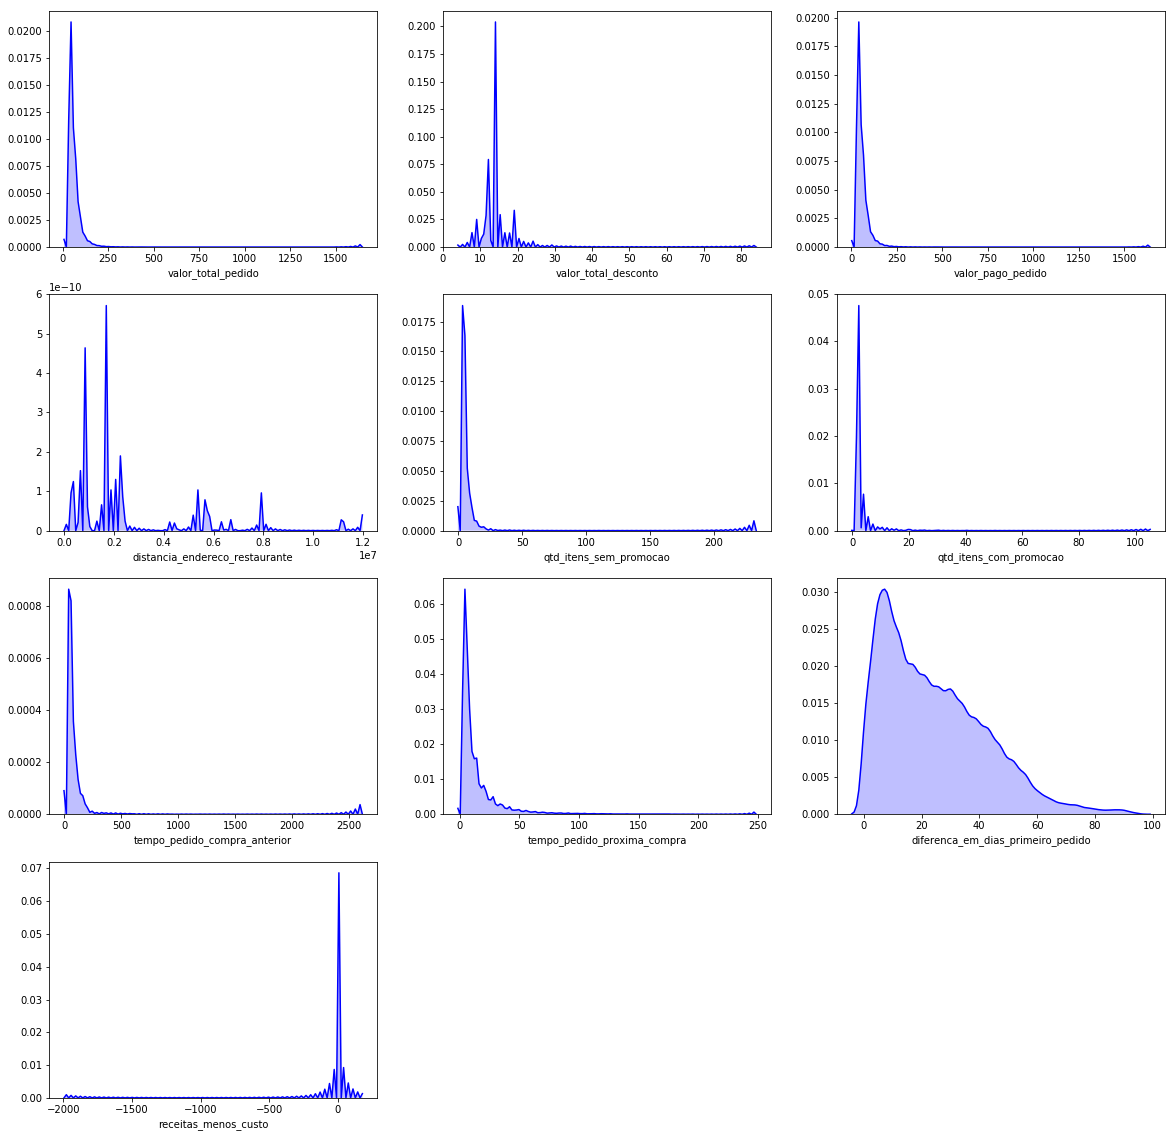

In [0]:
fig, ax = plt.subplots(15,1,figsize=(20,20))
for i, col in enumerate(numericas_pedidos):
    plt.subplot(4,3,i+1)
    plt.xlabel(col, fontsize=10)
    sns.kdeplot(numericas_pedidos[col].values,color="b",shade=True)
plt.show()

In [0]:
pedidos.head()

,order_id,order_number,data_hora_pedido,faixa_hora_pedido,data_ultimo_status_pedido,valor_total_pedido,valor_total_desconto,valor_pago_pedido,tipo_entrega,houve_agendamento,data_criacao_agendamento,versao_app,tipo_ambiente,tipo_plataforma,metodo_pagamento,estado_entrega,cidade_entrega,bairro_entrega,centroide_usuario,assinatura_ativo_na_compra,status_usuario_mes_anterior,intervalo_dias_ultima_compra,frequencia_compra_usuario,cobertura_restaurantes_usuario,categoria_compras_promocao_usuario,classificacao_cliente,renda_usuario,segmentacao_shift_maior_numero_pedidos,id_restaurante,cidade_restaurante,bairro_restaurante,centroide_restaurante,tipo_restaurante,distancia_endereco_restaurante,pedido_promocao,qtd_itens_sem_promocao,qtd_itens_com_promocao,tempo_pedido_compra_anterior,tempo_pedido_proxima_compra,order_date_local_x,pedido_valido,session_id,customer_id_x,mes_cliente_primeiro_pedido,dia_cliente_primeiro_pedido,diferenca_em_dias_primeiro_pedido,receitas_menos_custo,fim_de_semana_pedido,mes_pedido,dia_pedido,hora_pedido,dia_semana_pedido,lat_usuario,log_usuario,lat_restaurante,log_restaurante
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,lunch (10 - 14:59h),2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,> 66% das compras utilizando promoção,NaN,Sem informação,None,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,Não,2.0,0.0,2.0,1.0,2019-12-11,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...,4,14,32.0,6.901044,Meio da Semana,12,11,13,Wednesday,-5.8,-35.2,-5.8,-35.18
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,dinner (17 - 23:59h),2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,> 91 dias,Entre 4 e 10 pedidos/mês,> 500,33-66% das compras utilizando promoção,otimo,Sem informação,None,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.823183,Sim,0.0,1.0,7.0,1.0,2019-11-06,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...,12,8,35.0,6.028775,Meio da Semana,11,6,17,Wednesday,-23.3,-51.19,-23.3,-51.19
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,dinner (17 - 23:59h),2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,None,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,33-66% das compras utilizando promoção,otimo,Sem informação,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,Não,2.0,0.0,5.0,1.0,2019-06-11,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...,10,7,20.0,9.878150,Meio da Semana,6,11,20,Tuesday,-23.6,-46.59,-23.6,-46.61
3,34a60e0d-0042-49af-9aa8-4dc526a998c2,679245732,2019-06-05T19:16:42.111Z,dinner (17 - 23:59h),2019-06-05T21:17:13.264Z,58.90,4.0,54.9,DELIVERY,False,2019-06-05T19:16:42.111Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,PR,LONDRINA,Centro,-23.31-51.17,None,Active,> 91 dias,Entre 4 e 10 pedidos/mês,> 500,33-66% das compras utilizando promoção,otimo,Sem informação,5. Jantar,178646,LONDRINA,Centro,-23.31-51.17,Lanches,441.677507,Não,1.0,0.0,9.0,2.0,2019-06-05,1,93f66506-a8ba-4c22-97ea-7489131958bb,ac89a3eb35853705a09d54f1e5988ad876628b986045cd...,9,23,21.0,10.487919,Meio da Semana,6,5,19,Wednesday,-23.3,-51.17,-23.3,-51.17
4,998f6d97-f884-40ba-a7a3-e9691930a642,1052187003,2019-10-15T21:01:23.973Z,dinner (17 - 23:59h),2019-10-15T23:01:41.146Z,54.80,14.0,50.8,DELIVERY,False,2019-10-15T21:01:23.973Z,Android_iFood_9.22.1,MOBILE,ANDROID,CC_ONLINE,SP,SAO PAULO,Parque Panamericano,-23.45-46.73,False,Active,28 e 91 dias atrás,Entre 4 e 10 pedidos/mês,150 - 500,33-

### 8) Escolha das variáveis 


### Variáveis qualitativas

##### Identificadores
- customer_id_x
- order_id
- order_number
- id_restaurante
- session_id

##### Variáveis categóricas
- pedido_valido 
- pedido_promocao
- tipo_restaurante
- mes_cliente_primeiro_pedido
- first_order_date
- order_date_local_x
- data_pedido_horario_local
- hora_pedido
- data_ultimo_status_pedido
- data_criacao_afendamento
- tipo_plataforma
- metodo_pagamento
- status_usuario_mes_anterior
- intervalo_dias_ultima_compra
- frequencia_compra_usuario
- cobertura_restaurantes_usuario
- categoria_compras_promocao_usuario
- faixa_hora_pedido
- fim_de_semana_pedido
- estado_entrega

### Variáveis quantitativas


##### Variáveis discretas
- diferenca_em_dias_primeiro_pedido
- tempo_pedido_proxima_compra
- qtd_itens_sem_promocao
- qtd_itens_com_promocao
- mes_pedido
- mes_cliente_primeiro_pedido
- dia_cliente_primeiro_pedido
- hora_pedido
- dia_pedido
##### Variáveis continuas
- valor_total_pedido
- valor_total_desconto
- valor_pago_pedido
- distancia_endereco_restaurante
- receitas_menos_custo (lucro)
- tempo_pedido_compra_anterior
- tempo_pedido_proxima_compra
- lat_usuario
- log_usuario
- lat_restaurante
- log_restaurante

### Variáveis excluidas
- renda_usuario (99,08% de renda não informada, 479431 registrols)
- assinatura_ativo_na_compra (59,16% de nulos, 291126 registros)
- tipo_entrega  apresenta 99.7% dos dados concentrados em um categoria (entrega delivery)
- versao_app apresenta alta granularidade para uma variável categorica 722 valores distintos
- houve_agendamento possui 99.63% dos dados concentrados em uma categoria (não houve agendamento)
- tipo_ambiente possui 97,41% dos dados concentrado em uma categoria (pedidos feito pelo ambiente mobile)
- segmentacao_shift_maior_numero_pedidos 88,53% dos dados estão concentrados na categoria jantar mais valores nulos
- bairro_restaurante, cidade_restaurante apresentam alta granularidade para uma variável categorica, será usado latitude e longitude do restaurante como features
- cidade_entrega,  bairro_entrega apresentam alta granularidade para uma variável categorica, será usado latitude e longitude do usuario como features
- classificacao_cliente (variável com a segmentação do cliente)
- Variavéis de identificação não entrarão em modelos estatísticos ou de inteligencia artificial

### Analytical base table

ETL que irá gerar a ABT

In [0]:
orders = df_orders.toPandas().merge(df_orders_with_cost_revenue.toPandas(),on='order_number',how='left')
orders.drop(columns=['customer_id_y','frn_id_y','order_date_local_y'],axis=1)

#Criando uma coluna com apontamento do pedido no fim de semana ou meio da semana
orders['fim_de_semana_pedido'] = orders['order_shift'].str.contains("weekday").astype(int)
orders['fim_de_semana_pedido'] = np.where(orders['fim_de_semana_pedido']==1,'Meio da Semana','Fim da Semana')

#Criando uma coluna com a faixa do horário do pedido
faixa_hora = {'weekday dinner': 'dinner (17 - 23:59h)',
             'weekend dinner': 'dinner (17 - 23:59h)',
              'weekday lunch': 'lunch (10 - 14:59h)',
              'weekend lunch': 'lunch (10 - 14:59h)',
              'weekday snack': 'snack (15 - 16:59h)',
              'weekend snack': 'snack (15 - 16:59h)',
              'weekend dawn': 'dawn (0 - 4:59h)',
              'weekday dawn': 'dawn (0 - 4:59h)',
              'weekday breakfast': 'breakfast (5 - 9:59h)',
              'weekend breakfast': 'breakfast (5 - 9:59h)' }
orders['order_shift'] = orders['order_shift'].map(faixa_hora)



#De-para categoria de compra do cliente
cliente_promocao = {'Alta': '> 66% das compras utilizando promoção',
                   'Media': '33-66% das compras utilizando promoção',
                    'Baixa': '<33% das compras utilizando promoção'}

orders['customer_seg_benefits_sensitivity_bucket'] = orders['customer_seg_benefits_sensitivity_bucket'].map(cliente_promocao)

#De-para da coluna que indica a presença de promoção
orders['promo_is_promotion'] = np.where(orders['promo_is_promotion'] == 1.0 ,'Sim','Não')

#De-para frequencia de compra do cliente por mês
freq_mes_cliente = {1: 'Menos que 1 pedido/mês',
                       2: 'Entre 1 e 2 pedidos/mês',
                       3: 'Entre 2 e 4 pedidos/mês',
                       4: 'Entre 4 e 10 pedidos/mês',
                       5: 'Mais que 10 pedidos/mês'}

orders['customer_seg_frequency_bucket'] = orders['customer_seg_frequency_bucket'].map(freq_mes_cliente)

#De-para da renda estimado do ibge por localizacao
renda_estimada_ibge = {1: '> 19960',
                       2: '9998 - 19960',
                       3: '3992 - 9998',
                       4: '1996 - 3992',
                       5: '< 1996',
                       6: 'Sem informação'}

orders['customer_seg_gross_income_bucket'] = orders['customer_seg_gross_income_bucket'].map(renda_estimada_ibge)

#De-para intervalo em dias ultima compra
intervalo_dias = {1: '> 91 dias',
                 2: '28 e 91 dias atrás',
                 3: '14 e 28 dias atrás',
                 4: '7 e 14 dias atrás',
                 5: '< 7 dias'}

orders['customer_seg_recency_bucket'] = orders['customer_seg_recency_bucket'].map(intervalo_dias)

#De-para com a cobertura do restaurante

cobertura = {1: '0 - 30',
             2: '30 - 90',
             3: '90 - 150',
             4: '150 - 500',
             5: '> 500'}

orders['customer_seg_merchant_offer_bucket'] = orders['customer_seg_merchant_offer_bucket'].map(cobertura)



#Dropando colunas iguais entre pedidos e pedidos com custo
orders = orders.drop(columns=['customer_id_y','order_date_local_y','frn_id_y'],axis=1)

#criando variavel mes 
orders['mes_pedido']= (pd.to_datetime(orders.order_timestamp_local, unit='ns',errors='coerce')).dt.month

#criando variavel dia
orders['dia_pedido']= (pd.to_datetime(orders.order_timestamp_local, unit='ns',errors='coerce')).dt.day

#criando variavel hora
orders['hora_pedido']= (pd.to_datetime(orders.order_timestamp_local, unit='ns',errors='coerce')).dt.hour

#criando variavel dia da semana
orders['dia_semana_pedido']= (pd.to_datetime(orders.order_timestamp_local, unit='ns',errors='coerce')).dt.weekday_name

#criando variavel mes 
orders['cohort_month']= (pd.to_datetime(orders.cohort_month, unit='ns',errors='coerce')).dt.month

#criando variavel dia
orders['first_order_date']= (pd.to_datetime(orders.first_order_date, unit='ns',errors='coerce')).dt.day

# orders['lat_usuario'] = orders['customer_centroid_id'].apply(lambda x : re.split(r'[0-9]-', x)[0])
# orders['log_usuario'] = '-' + orders['customer_centroid_id'].apply(lambda x : re.split(r'[0-9]-', x)[1])

# orders['lat_restaurante'] = orders['merchant_centroid_id'].apply(lambda x : re.split(r'[0-9]-', x)[0])
# orders['log_restaurante'] = orders['merchant_centroid_id'].apply(lambda x : re.split(r'[0-9]-', x))
# orders['log_restaurante']  = '-' + orders.log_restaurante.apply(lambda x: x[x.index(max(x))])

# orders['lat_usuario'] = orders['lat_usuario'].astype(float)
# orders['log_usuario'] = orders['log_usuario'].astype(float)

# orders2 = orders[orders['lat_restaurante'].str.len()<6]
# orders2 = orders[orders['log_restaurante'].str.len()<6]
# orders2['log_restaurante'] = orders2['log_restaurante'].astype(float)
# orders2['lat_restaurante'] = orders2['lat_restaurante'].astype(float)

orders[['lat_usuario', 'log_usuario']] = orders['customer_centroid_id'].str.extract(r'(-?\d?\d.\d\d?)(-?\d?\d.\d\d?)')
orders['lat_usuario'] = orders['lat_usuario'].astype(float)
orders['log_usuario'] = orders['log_usuario'].astype(float)

orders[['lat_restaurante', 'log_restaurante']] = orders['merchant_centroid_id'].str.extract(r'(-?\d?\d.\d\d?)(-?\d?\d.\d\d?)')
orders['lat_restaurante'] = orders['lat_restaurante'].astype(float)
orders['log_restaurante'] = orders['log_restaurante'].astype(float)

prOrders = orders
#pdOrders = orders.drop(columns = ['customer_seg_gross_income_bucket' #renda usuario
#                       ,'customer_has_plus' #cliente ativo na compra
#                       ,'delivery_type'
#                       ,'device_app_version'
#                       ,'scheduled'
#                       ,'device_type'
#                       ,'customer_seg_preferred_shift'
#                       ,'customer_district'
#                       ,'customer_city'
#                       ,'merchant_district'
#                       ,'merchant_city'
#                       ,'scheduled_creation_date_local'
#                       ,'customer_seg_marlin_tag'
#                       ,'last_status_date_local'
#                       ,'merchant_centroid_id'
#                       ,'customer_centroid_id'
#                        ],axis=1)

In [0]:
#prOrders = pd.get_dummies(prOrders,
                      columns= ['dia_semana_pedido','order_shift','merchant_dish_type'])
prOrders[~prOrders['merchant_dish_type'].isIn(['Lanches'])]


File "<command-2603687575131815>" , line 2 
 columns= ['dia_semana_pedido','order_shift','merchant_dish_type']) 
 ^
 IndentationError : unexpected indent

In [0]:
orders[
  ~orders['merchant_dish_type'].isin(['Lanches', 'Comida Japonesa'])
].head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id_x,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local_x,valid_order,session_id,customer_id_x,cohort_month,first_order_date,months_after_first_purchase,general_net_profit,fim_de_semana_pedido,mes_pedido,dia_pedido,hora_pedido,dia_semana_pedido,lat_usuario,log_usuario,lat_restaurante,log_restaurante
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,lunch (10 - 14:59h),2019-12-11T15:22:39.156Z,28.9,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,> 66% das compras utilizando promoção,None,Sem informação,None,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,Não,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...,4,14,32.0,6.901044,Meio da Semana,12,11,13,Wednesday,-5.89,-35.20,-5.87,-35.18
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,dinner (17 - 23:59h),2019-06-11T22:42:54.005Z,53.8,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,None,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,33-66% das compras utilizando promoção,1. Marlin,Sem informação,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,Não,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...,10,7,20.0,9.878150,Meio da Semana,6,11,20,Tuesday,-23.64,-46.59,-23.64,-46.61
5,0d8b3571-be59-48c0-bb92-b7f3ce2793a0,686714753,2019-06-08T14:44:02.062Z,lunch (10 - 14:59h),2019-06-08T15:25:13.583Z,131.9,4.0,127.9,DELIVERY,False,2019-06-08T14:44:02.062Z,iOS_iFood_8.54.1,MOBILE,IOS,CC_ONLINE,DF,BRASILIA,Setor De Habitacoes Individuais Sul,-15.84-47.84,None,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,33-66% das compras utilizando promoção,1. Marlin,Sem informação,5. Jantar,180004,BRASILIA,Vila Planalto,-15.79-47.85,Doces & Bolos,5891.546259,Não,18.0,0.0,2.0,3.0,2019-06-08T00:00:00.000Z,1,0260bfa3-e8e4-4b62-9500-5529600dc309,45751a4f75fbd494aa7e275932ab0791b1542ea30df8ff...,3,21,39.0,17.726744,Fim da Semana,6,8,14,Saturday,-15.84,-47.84,-15.79,-47.85


In [0]:
parquetOrders = spark.createDataFrame(pdOrders)
parquetOrders.write.parquet('/dbfs/FileStore/preprocess/orders', mode='overwrite')

### Criando tabela temporária para rodar o %sql

In [0]:
dfOrders = spark.read.parquet('/dbfs/FileStore/preprocess/orders')
dfOrders.count()
dfOrders.createOrReplaceTempView('orders')

### Voltando do sql para o spark

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW sample AS
SELECT order_total, credit, paid_amount FROM orders LIMIT 1

In [0]:
sample = spark.table('sample')
sample.toPandas().transpose()

,0
order_total,323.4
credit,4.0
paid_amount,319.4


In [0]:
%sql 

select  * from orders limit 5

order_id,order_number,order_timestamp_local,order_shift,order_total,credit,paid_amount,device_platform,payment_method,customer_state_label,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,frn_id_x,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local_x,valid_order,session_id,customer_id_x,cohort_month,first_order_date,months_after_first_purchase,general_net_profit,fim_de_semana_pedido,mes_pedido,dia_pedido,hora_pedido,dia_semana_pedido,lat_usuario,log_usuario,lat_restaurante,log_restaurante
9f24cb86-6f5b-4717-be04-ea46b0211aef,1330837847,2019-12-20T19:38:57.511Z,dinner (17 - 23:59h),323.4,4.0,319.4,IOS,CC_ONLINE,RJ,Active,> 91 dias,Mais que 10 pedidos/mês,> 500,<33% das compras utilizando promoção,64331,Comida Variada,4401.021017179184,Não,16.0,0.0,3.0,2.0,2019-12-20T00:00:00.000Z,1,25f87536-2f65-4a90-b456-fe1f6bf20ce8,0ef91c2b7eb3ef549a7965987ec14ad2f8788739214165fa50356c091a6ef9e4,2,4,58.0,29.715599999999995,Fim da Semana,12,20,19,Friday,-23.0,-43.26,-22.98,-43.22
68bce548-188a-4406-aa80-32e73fe53f64,1007110740,2019-10-03T18:08:41.490Z,dinner (17 - 23:59h),36.5,4.0,32.5,IOS,CC_ONLINE,SC,Active,> 91 dias,Entre 4 e 10 pedidos/mês,> 500,> 66% das compras utilizando promoção,93838,Lanches,2128.707643381722,Não,3.0,0.0,2.0,1.0,2019-10-03T00:00:00.000Z,1,97eb470e-7d23-40e2-b05e-ef25f7915535,123e507b853ce5c0984e89ae40bc9261e3cd7b40acfe6aed9644d50ceb074bc0,6,3,16.0,7.80971875,Meio da Semana,10,3,18,Thursday,-27.6,-48.59,-27.6,-48.61
d4146d24-754e-443b-b6d5-3f8d31d712e4,904907222,2019-09-01T22:15:59.516Z,dinner (17 - 23:59h),43.0,4.0,39.0,ANDROID,OTHERS_OFFLINE,RS,Churn,7 e 14 dias atrás,Entre 1 e 2 pedidos/mês,150 - 500,33-66% das compras utilizando promoção,44177,Lanches,532.8167152479697,Não,1.0,0.0,49.0,122.0,2019-09-01T00:00:00.000Z,1,ca6fcdf6-adff-4d70-9e3f-e181fd6e9348,37c88e9cfce1a132792c2eaeaefa12ac030da75b3525d51b6439145180ff8b4d,12,28,9.0,8.195,Fim da Semana,9,1,22,Sunday,-29.93,-51.0,-29.94,-51.0
b10d3d55-6929-4d17-9de8-a18c21e9ab3c,768810346,2019-07-12T11:32:27.313Z,lunch (10 - 14:59h),26.0,4.0,22.0,ANDROID,CC_OFFLINE,SP,Resurrected,> 91 dias,Entre 1 e 2 pedidos/mês,> 500,> 66% das compras utilizando promoção,250781,Marmita,4228.75170949949,Não,1.0,0.0,2.0,16.0,2019-07-12T00:00:00.000Z,1,82839b16-8599-4b7c-b628-3c1d9087e55e,d94f958e3664b0efbbd430909b9eca57454583f362c186d36d8a80d230529773,8,11,23.0,6.3845,Meio da Semana,7,12,11,Friday,-21.19,-47.79,-21.2,-47.83
7c4fad52-bede-4507-b3f0-d26e4f414b4e,674510022,2019-06-03T20:21:16.635Z,dinner (17 - 23:59h),60.99,4.0,56.99,ANDROID,OTHERS_OFFLINE,SP,Active,> 91 dias,Entre 4 e 10 pedidos/mês,> 500,<33% das compras utilizando promoção,52948,Pizza,3285.316433630998,Não,1.0,0.0,9.0,5.0,2019-06-03T00:00:00.000Z,1,bc6d9b1b-a4be-4292-b589-2dbfb12c05b7,3cea7f17a7c1b04fceb1dcedb94f0f304fca3e8b8d09db8e5ba3baa8008b18c3,5,1,49.0,10.110935,Meio da Semana,6,3,20,Monday,-23.61,-46.62,-23.58,-46.62


In [0]:
%sql
select customer_id_x
,mes_pedido
,cohort_month
,months_after_first_purchase
,avg(order_total)
,sum(order_total)
,avg(credit)
,sum(paid_amount)
,avg(distance_merchant_customer)
,sum(normal_items_quantity)
,avg(normal_items_quantity)
,sum(order_lag_at_login)
,avg(order_lag_at_login)
,sum(order_lead_at_login)
,avg(order_lead_at_login)
,sum(general_net_profit)
,avg(general_net_profit)
,avg(hora_pedido)
,avg(lat_usuario)
,avg(log_usuario)
,count(order_number)
from orders
where 
group by customer_id_x
       ,mes_pedido
       ,cohort_month
       ,months_after_first_purchase

customer_id_x,mes_pedido,cohort_month,months_after_first_purchase,avg(order_total),sum(order_total),avg(credit),sum(paid_amount),avg(distance_merchant_customer),sum(normal_items_quantity),avg(normal_items_quantity),sum(order_lag_at_login),avg(order_lag_at_login),sum(order_lead_at_login),avg(order_lead_at_login),sum(general_net_profit),avg(general_net_profit),avg(hora_pedido),avg(lat_usuario),avg(log_usuario),count(order_number)
ae13e299d31007261039342248c289a9a8668a52313ae3636fc5a58180c7b3a5,12,4,20.0,59.7475,238.99,6.5,212.99,1193.3213424624732,3.0,0.75,30.0,7.5,39.0,9.75,30.00486,7.501215,18.5,-20.3,-40.32,4
66138db9de4f27c95c6362815cf1b54730f3a663be5df54b69d383b89e455ba9,11,1,46.0,63.720000000000006,318.6,10.8,274.6,3230.1694357967635,10.0,2.0,18.0,3.6,85.0,17.0,32.133025,6.426605,19.4,-21.782,-43.35,5
964ece56f9e6ffef028190fa51a46b35e3b60b57001f7fdf30727d98c2ce6f4d,8,2,30.0,52.07888888888888,468.71,4.0,432.71,2625.1114447313557,9.0,1.0,37.0,4.111111111111111,31.0,3.4444444444444446,32.84842913887615,3.6498254598751276,18.11111111111111,-25.422222222222224,-49.26222222222222,9
62dbc5a5b3e5a33b2d43d2f21e5bb03f8a203994c7ffe956b4be43471a4c5382,11,11,36.0,37.35875,298.87,9.0,266.87,947.2879893864534,1.0,0.125,22.0,2.75,33.0,4.125,60.75365500000001,7.594206875000001,11.0,-23.56,-46.64,8
5cd952202fa8cd6540ba7ab9f3f975c9cd04abccc3659ca007016da3024ef15d,6,9,45.0,58.9975,471.98,4.0,439.98,4501.746386832524,11.0,1.375,28.0,3.5,31.0,3.875,80.33937,10.04242125,18.25,-3.11125,-59.99249999999999,8
f7acae4520f76490c00f81dc6cdc5e5c52b2dcb634ac84c288de0befcab72cc2,8,6,26.0,41.21,123.63,12.0,87.63,3326.0816098737664,2.0,0.6666666666666666,17.0,5.666666666666667,49.0,16.333333333333332,-27.20031008957962,-9.066770029859873,11.0,-23.459999999999997,-46.57,3
76b987bb1b59355cfac76faeb1b24cd738bee914daf4bc408a52b5c90104d978,9,9,72.0,46.492000000000004,232.46,4.0,212.46,1839.9909030806543,3.0,0.6,30.0,6.0,28.0,5.6,13.092421424826444,2.6184842849652887,12.6,-23.594,-46.658,5
b42b0a4102997b52e55634d8c7c302302c737397cd7db8c68d99292bfb34eaed,11,3,20.0,36.242222222222225,652.36,16.766666666666666,439.05999999999995,2006.3326911735794,15.0,0.8333333333333334,26.0,1.4444444444444444,27.0,1.5,13.802326693912132,0.7667959274395629,15.333333333333334,-23.33,-51.17055555555556,18
806b0bf5750dfbbdeace85090c4ae60e3c819912d66e70acf4fad81b0d1329f4,6,2,4.0,48.176,240.88,4.0,220.88,5205.8627398767285,18.0,3.6,22.0,4.4,77.0,15.4,43.491367499999996,8.698273499999999,19.8,-23.688,-46.378,5
38c6ab8f408633aabd8e3c543102d6d9027f5b453262591a439d5967caa10821,6,11,19.0,51.75,103.5,4.0,95.5,1340.6803234784752,4.0,2.0,16.0,8.0,20.0,10.0,12.662879002449934,6.331439501224967,20.0,-30.03,-51.19,2


In [0]:
%sql
create or replace temporary view teste as
SELECT
customer_id_x,
dia_semana_pedido,
order_shift,
merchant_dish_type,
COUNT(*) total
from orders
group by 1, 2, 3, 4

ORDER BY customer_id_x limit 100

In [0]:
pdTeste = spark.table('teste').toPandas()

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-2603687575131812> in <module> 
 1 pdTeste = spark . table ( 'teste' ) . toPandas ( ) 
 ----> 2 pdTeste [ 'dia_semana_pedido' ] . getDummies ( ) 

 /databricks/python/lib/python3.7/site-packages/pandas/core/generic.py in __getattr__ (self, name) 
 5065 if self . _info_axis . _can_hold_identifiers_and_holds_name ( name ) : 
 5066 return self [ name ] 
 -> 5067 return object . __getattribute__ ( self , name ) 
 5068 
 5069 def __setattr__ ( self , name , value ) : 

 AttributeError : 'Series' object has no attribute 'getDummies'

In [0]:
import pandas as pd
pd.get_dummies(pdTeste, columns=['dia_semana_pedido','order_shift','merchant_dish_type'])

,customer_id_x,total,dia_semana_pedido_Saturday,dia_semana_pedido_Sunday,dia_semana_pedido_Tuesday,order_shift_dinner (17 - 23:59h),order_shift_lunch (10 - 14:59h),merchant_dish_type_Comida Chinesa,merchant_dish_type_Pizza
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,1,0,1,0,0,1,1,0
1,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,1,1,0,0,1,0,0,1
2,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,1,0,0,1,1,0,0,1


In [0]:
%sql
describe orders

col_name,data_type,comment
order_id,string,null
order_number,bigint,null
order_timestamp_local,string,null
order_shift,string,null
order_total,double,null
credit,double,null
paid_amount,double,null
device_platform,string,null
payment_method,string,null
customer_state_label,string,null
